## Data Exploration of Book Dataset

#### Importing necessary modules

In [137]:
import seaborn as sns
from PIL import Image
from PIL import ImageStat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
from tqdm import tqdm

plt.ion()   # interactive mode !

#### Importing the data

In [27]:
# locating the data
data_dir = 'C:\\Users\\SayaliGirish\\Desktop\\BookDataset\\'

In [31]:
# Empty lists
categories = []
img_categories = []
n_data = []
hs = []
ws = []

# Iterate through each category
for d in os.listdir(data_dir):
    categories.append(d)

    # Number of each image
    data_imgs = os.listdir(data_dir + d)
    n_data.append(len(data_imgs))

    # Find stats for images
    for i in data_imgs:
        img_categories.append(d)
        img = Image.open(data_dir + d + '/' + i)
        img_array = np.array(img)
        # Shape
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

# Dataframe of categories
df = pd.DataFrame({'category': categories,
                       'n_data': n_data}).\
    sort_values('category')

# Dataframe of images
image_df = pd.DataFrame({
    'category': img_categories,
    'height': hs,
    'width': ws
})

df.sort_values('n_data', ascending=False, inplace=True)
df.head()

,category,n_data
20,Reference,1547
23,Science & Math,1532
0,Arts & Photography,1487
16,Medical Books,1442
3,Calendars,1388


#### Visualizing the data

In [80]:
# Top 5 categories based on number of images 
df.head(5)

,category,n_data
28,Test Preparation,1681
1,Biographies & Memoirs,1679
22,Romance,1673
17,"Mystery, Thriller & Suspense",1670
18,Parenting & Relationships,1670


In [45]:
# Total number of images present in dataset
image_df.shape

(47860, 3)

In [78]:
# Statistics about the height and width of images
image_df.describe()

,height,width
count,47860.000000,47860.00000
mean,490.430840,356.77102
std,43.522716,60.48596
min,47.000000,32.00000
25%,500.000000,326.00000
50%,500.000000,334.00000
75%,500.000000,386.00000
max,2560.000000,2960.00000


Text(0.5, 1.0, 'Average Size Distribution')

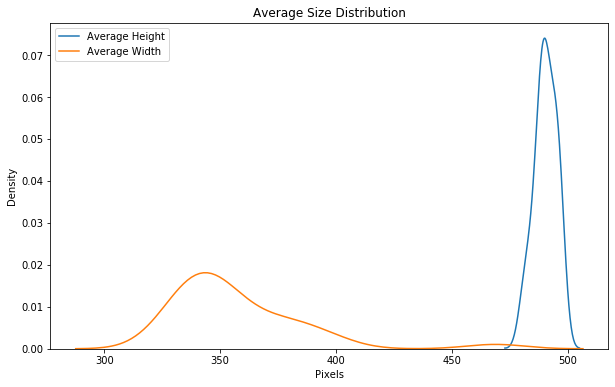

In [84]:
# PLotting the distribution of average height and average width of the images
plt.figure(figsize=(10, 6))
sns.kdeplot(
    img_dsc['height']['mean'], label='Average Height')
sns.kdeplot(
    img_dsc['width']['mean'], label='Average Width')
plt.xlabel('Pixels')
plt.ylabel('Density')
plt.title('Average Size Distribution')

In [81]:
# Statistics about the images per category 
img_dsc = image_df.groupby('category').describe()
img_dsc.head()

height                                              \
                        count        mean        std    min    25%    50%   
category                                                                    
Arts & Photography     1487.0  486.766644  41.862526   49.0  500.0  500.0   
Biographies & Memoirs  1679.0  495.288267  29.464939  140.0  500.0  500.0   
Business & Money       1629.0  493.664211  36.859496  140.0  500.0  500.0   
Calendars              1388.0  480.266571  45.644905  130.0  499.0  500.0   
Children's Books       1653.0  481.566243  54.810194   47.0  500.0  500.0   

                                      width                                \
                         75%    max   count        mean        std    min   
category                                                                    
Arts & Photography     500.0  500.0  1487.0  394.769334  58.237805   60.0   
Biographies & Memoirs  500.0  500.0  1679.0  332.259678  34.256941   93.0   
Business & Money       500.0  665.0  1629.0  348.306323  41.742911   92.0   
Calendars              500.0  500.0  1388.0  468.689481  65.206384  104.0   
Children's Books       500.0  500.0  1653.0  398.130672  74.440438   60.0   

                                                   
                         25%    50%    75%    max  
category                                           
Arts & Photography     360.0  386.0  418.0  500.0  
Biographies & Memoirs  324.0  331.0  333.0  500.0  
Business & Money       329.0  333.0  380.0  500.0  
Calendars              499.0  500.0  500.0  500.0  
Children's Books       344.0  387.0  475.0  579.0

Text(0.5, 1.0, 'Images by Category')

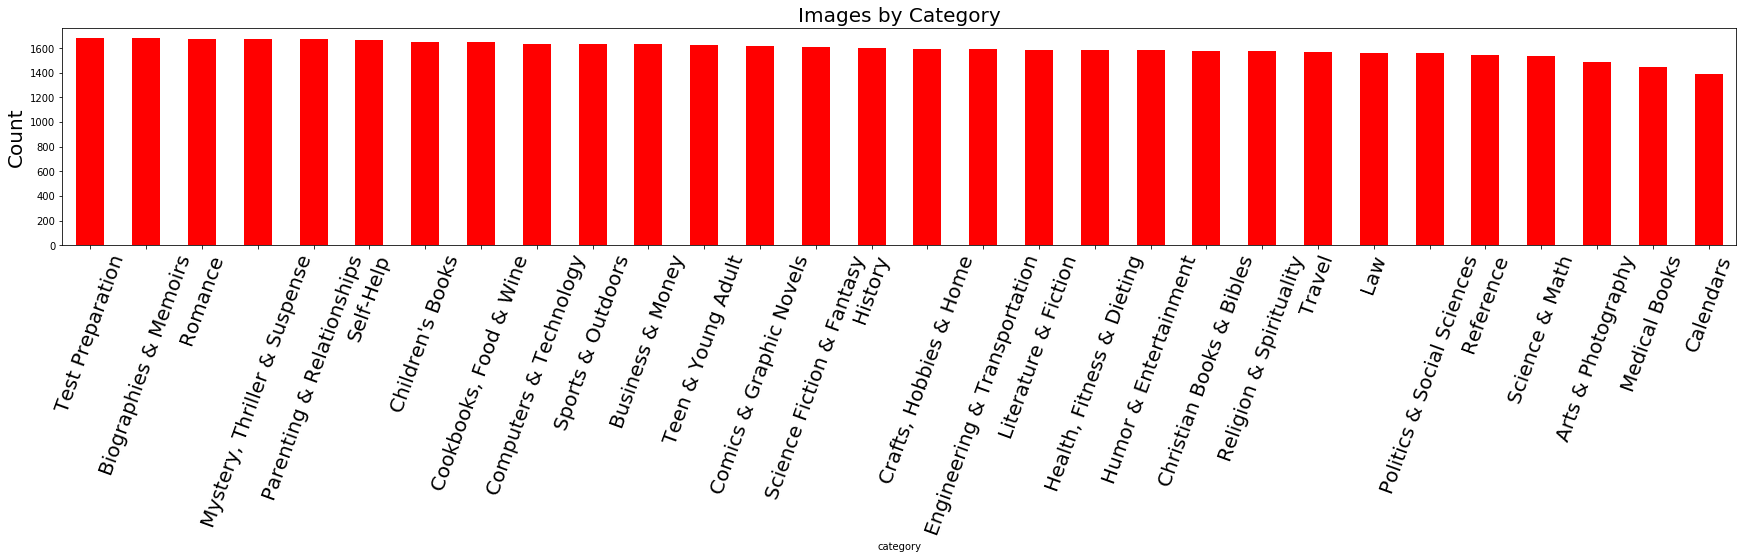

In [90]:
# Plot of number of images per category
df.set_index('category')['n_data'].plot.bar(
    color='red', figsize=(30, 4))
plt.xticks(rotation=70,size=20)
plt.ylabel('Count',size=20)
plt.title('Images by Category',size=20)

Text(0.5, 1.0, 'Training Images by Category')

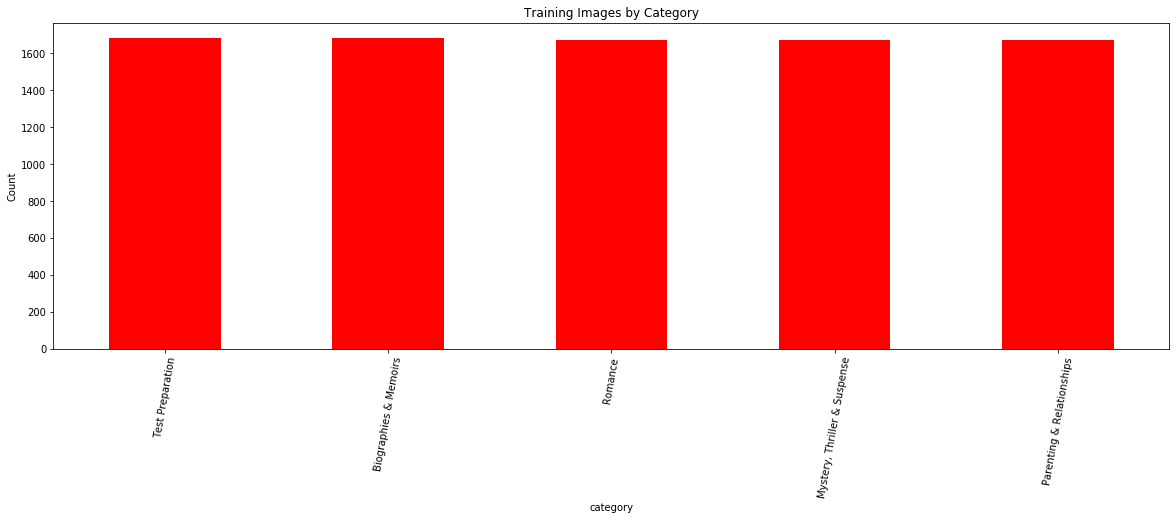

In [95]:
# Only top 5 categories
df.set_index('category').iloc[:5]['n_data'].plot.bar(
    color='r', figsize=(20, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')

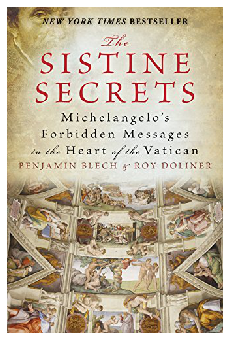

In [40]:
# Example image
x = Image.open(data_dir + 'Arts & Photography/006146905X.jpg')
np.array(x).shape
imshow(x)

In [ ]:
# Function to display image
def imshow(image):
    """Display image"""
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

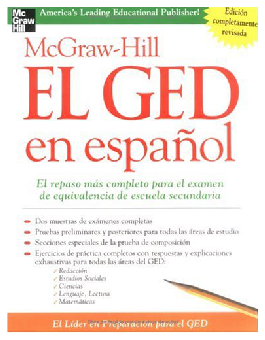

In [97]:
# Example image
x = Image.open(data_dir + 'Test Preparation/0071435131.jpg')
np.array(x).shape
imshow(x)

#### Calculate Image Stats
###### We want to normalize our inputs according to the pixel means and standard deviations of our images.
###### So, we will calculate these values here so that we can pass them to .normalize() like we do imagenet_stats.

In [130]:
# reading all the images
data_images = [data_dir+d+'/' +s for s in data_imgs]

In [145]:
# funtion to calculate mean RGB values for images in our dataset
def getMeans(paths):
    redSum = 0
    greenSum = 0
    blueSum = 0

    for path in paths:
        image = cv2.imread(path)
        #imshow(image)
        if image is not None:
            red = np.reshape(image[:,:,0], -1)
            green = np.reshape(image[:,:,1], -1)
            blue = np.reshape(image[:,:,2], -1)
            
            redMean = red.mean()
            greenMean = green.mean()
            blueMean = blue.mean()

            redSum = redSum + redMean
            greenSum = greenSum + greenMean
            blueSum = blueSum + blueMean
        
    redMean = redSum/len(paths)
    greenMean = greenSum/len(paths)
    blueMean = blueSum/len(paths)
    
    return (redMean, greenMean, blueMean)

In [150]:
# Find the mean of RGB values of the images
getMeans(data_images)

(119.20826081730144, 128.6331536754731, 134.5265084720439)

In [148]:
redMean, greenMean, blueMean = getMeans(data_images)

In [153]:
# Function to calculate standard deviation of images
def getStds(paths, redMean, greenMean, blueMean):
    redSum = 0
    greenSum = 0
    blueSum = 0

    for path in paths:
        image = cv2.imread(path)
        if image is not None:
            red = np.reshape(image[:,:,0], -1)
            green = np.reshape(image[:,:,1], -1)
            blue = np.reshape(image[:,:,2], -1)

            redDiffs = red - redMean
            redSumOfSquares = np.sum(redDiffs ** 2)
        
            blueDiffs = blue - blueMean
            blueSumOfSquares = np.sum(blueDiffs ** 2)
        
            greenDiffs = green - greenMean
            greenSumOfSquares = np.sum(greenDiffs ** 2)
        
            redSum = redSum + (1/(len(paths) * 96 * 96)) * redSumOfSquares
            greenSum = greenSum + (1/(len(paths) * 96 * 96)) * greenSumOfSquares
            blueSum = blueSum + (1/(len(paths) * 96 * 96)) * blueSumOfSquares
        
    redStd = np.sqrt(redSum)
    greenStd = np.sqrt(greenSum)
    blueStd = np.sqrt(blueSum)
    
    return (redStd, greenStd, blueStd)

In [154]:
redStd, greenStd, blueStd = getStds(data_images, redMean, greenMean, blueMean)

In [155]:
print("Red: ", redMean, redStd)
print("Green: ", greenMean, greenStd)
print("Blue: ", blueMean, blueStd)

Red:  119.20826081730144 334.92096525877577
Green:  128.6331536754731 328.85110499061085
Blue:  134.5265084720439 354.52447255837257


In [156]:
# Since the 
bookdata_stats = [[redMean/255, greenMean/255, blueMean/255], [redStd/255, blueStd/255, greenStd/255]]
print(bookdata_stats)

[[0.4674833757541233, 0.5044437399038161, 0.5275549351844859], [1.3134155500344147, 1.3902920492485198, 1.289612176433768]]
